练习R语言随机森林。

# 手动实现随机森林

In [1]:
library(tidyverse)
library(mlr3verse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: mlr3



In [2]:
# custom selector
selector_subsample <- function(task) {
  sample(task$feature_names, sqrt(length(task$feature_names)))
}

# bagging pipeline with our selector
gr_bagging_quasi_rf <- ppl(
  "bagging",
  graph = po("select", selector = selector_subsample) %>>%
    lrn("classif.rpart", minsplit = 1),
  iterations = 100,
  averager = po("classifavg", collect_multiplicity = TRUE)
)

# bootstrap resampling
gr_bagging_quasi_rf$param_set$values$subsample.replace <- TRUE

# convert to learner
glrn_quasi_rf <- as_learner(gr_bagging_quasi_rf)
glrn_quasi_rf$id <- "quasi.rf"

# benchmark
design <- benchmark_grid(
  tsks("sonar"),
  c(glrn_quasi_rf, lrn("classif.ranger", num.trees = 100)),
  rsmp("cv", folds = 5)
)
bmr <- benchmark(design)
bmr$aggregate()[, .(learner_id, classif.ce)]

INFO  [18:54:59.738] [mlr3] Running benchmark with 10 resampling iterations
INFO  [18:54:59.786] [mlr3] Applying learner 'quasi.rf' on task 'sonar' (iter 1/5)
INFO  [18:55:02.344] [mlr3] Applying learner 'quasi.rf' on task 'sonar' (iter 2/5)
INFO  [18:55:04.788] [mlr3] Applying learner 'quasi.rf' on task 'sonar' (iter 3/5)
INFO  [18:55:07.231] [mlr3] Applying learner 'quasi.rf' on task 'sonar' (iter 4/5)
INFO  [18:55:09.614] [mlr3] Applying learner 'quasi.rf' on task 'sonar' (iter 5/5)
INFO  [18:55:12.246] [mlr3] Applying learner 'classif.ranger' on task 'sonar' (iter 1/5)
INFO  [18:55:12.567] [mlr3] Applying learner 'classif.ranger' on task 'sonar' (iter 2/5)
INFO  [18:55:12.585] [mlr3] Applying learner 'classif.ranger' on task 'sonar' (iter 3/5)
INFO  [18:55:12.647] [mlr3] Applying learner 'classif.ranger' on task 'sonar' (iter 4/5)
INFO  [18:55:12.666] [mlr3] Applying learner 'classif.ranger' on task 'sonar' (iter 5/5)
INFO  [18:55:12.685] [mlr3] Finished benchmark


learner_id,classif.ce
<chr>,<dbl>
quasi.rf,0.1879210
classif.ranger,0.1878049


# ranger

## 基础使用

In [ ]:
# 定义任务
task <- tsk("sonar")

# 定义学习器
lrn_ranger <- lrn("classif.ranger")

# 训练模型
lrn_ranger$train(task)

# 预测
predictions <- lrn_ranger$predict(task)

# 查看预测结果
predictions$score(msr("classif.ce"))

# classif.ce: 0

classif.ce 
         0

In [ ]:
lrn_ranger$param_set %>%
  as.data.table() %>%
  select(id, class, lower, upper) %>%
  print()

# id    class lower upper
#                           <char>   <char> <num> <num>
#  1:       always.split.variables ParamUty    NA    NA
#  2:                class.weights ParamUty    NA    NA
#  3:                      holdout ParamLgl    NA    NA
#  4:                   importance ParamFct    NA    NA
#  5:                   keep.inbag ParamLgl    NA    NA
#  6:                    max.depth ParamInt     1   Inf
#  7:                   min.bucket ParamUty    NA    NA
#  8:                min.node.size ParamUty    NA    NA
#  9:                         mtry ParamInt     1   Inf
# 10:                   mtry.ratio ParamDbl     0     1
# 11:                    na.action ParamFct    NA    NA
# 12:            num.random.splits ParamInt     1   Inf
# 13:                   node.stats ParamLgl    NA    NA
# 14:                  num.threads ParamInt     1   Inf
# 15:                    num.trees ParamInt     1   Inf
# 16:                    oob.error ParamLgl    NA    NA
# 17:        regularization.factor ParamUty    NA    NA
# 18:      regularization.usedepth ParamLgl    NA    NA
# 19:                      replace ParamLgl    NA    NA
# 20:    respect.unordered.factors ParamFct    NA    NA
# 21:              sample.fraction ParamDbl     0     1
# 22:                  save.memory ParamLgl    NA    NA
# 23: scale.permutation.importance ParamLgl    NA    NA
# 24:                         seed ParamInt  -Inf   Inf
# 25:         split.select.weights ParamUty    NA    NA
# 26:                    splitrule ParamFct    NA    NA
# 27:                      verbose ParamLgl    NA    NA
# 28:                 write.forest ParamLgl    NA    NA
#                               id    class lower upper

                              id    class lower upper
                          <char>   <char> <num> <num>
 1:       always.split.variables ParamUty    NA    NA
 2:                class.weights ParamUty    NA    NA
 3:                      holdout ParamLgl    NA    NA
 4:                   importance ParamFct    NA    NA
 5:                   keep.inbag ParamLgl    NA    NA
 6:                    max.depth ParamInt     1   Inf
 7:                   min.bucket ParamUty    NA    NA
 8:                min.node.size ParamUty    NA    NA
 9:                         mtry ParamInt     1   Inf
10:                   mtry.ratio ParamDbl     0     1
11:                    na.action ParamFct    NA    NA
12:            num.random.splits ParamInt     1   Inf
13:                   node.stats ParamLgl    NA    NA
14:                  num.threads ParamInt     1   Inf
15:                    num.trees ParamInt     1   Inf
16:                    oob.error ParamLgl    NA    NA
17:        regularization.fa

## 调参

In [ ]:
lts() %>%
  as.data.table() %>%
  select(key, label) %>%
  filter(str_detect(key, "ranger")) %>%
  print()

# Key: <key>
#                       key                                label
#                    <char>                               <char>
# 1: classif.ranger.default   Classification Ranger with Default
# 2:    classif.ranger.rbv1 Classification Ranger with RandomBot
# 3:    classif.ranger.rbv2 Classification Ranger with RandomBot
# 4:    regr.ranger.default       Regression Ranger with Default
# 5:       regr.ranger.rbv1     Regression Ranger with RandomBot
# 6:       regr.ranger.rbv2     Regression Ranger with RandomBot

Key: <key>
                      key                                label
                   <char>                               <char>
1: classif.ranger.default   Classification Ranger with Default
2:    classif.ranger.rbv1 Classification Ranger with RandomBot
3:    classif.ranger.rbv2 Classification Ranger with RandomBot
4:    regr.ranger.default       Regression Ranger with Default
5:       regr.ranger.rbv1     Regression Ranger with RandomBot
6:       regr.ranger.rbv2     Regression Ranger with RandomBot


In [ ]:
ps_ranger <- lts("classif.ranger.default")
ps_ranger

# <TuningSpace:classif.ranger.default>: Classification Ranger with Default
#                 id lower upper levels logscale
#             <char> <num> <num> <list>   <lgcl>
# 1:      mtry.ratio   0.0     1 [NULL]    FALSE
# 2:         replace    NA    NA [NULL]    FALSE
# 3: sample.fraction   0.1     1 [NULL]    FALSE
# 4:       num.trees   1.0  2000 [NULL]    FALSE

<TuningSpace:classif.ranger.default>: Classification Ranger with Default
                id lower upper levels logscale
            <char> <num> <num> <list>   <lgcl>
1:      mtry.ratio   0.0     1 [NULL]    FALSE
2:         replace    NA    NA [NULL]    FALSE
3: sample.fraction   0.1     1 [NULL]    FALSE
4:       num.trees   1.0  2000 [NULL]    FALSE

In [16]:
# 定义任务
tsk_sonar <- tsk("sonar")

# 定义模型
lrn_ranger <- lrn("classif.ranger")

# 定义调参空间
ps_ranger <- lts("classif.ranger.default")

# 定义调参器
tuner_ranger <- tnr("grid_search", resolution = 5)

# 并行化
future::plan("multisession", workers = 4)

# 调参
instance <- tune(
  task = tsk_sonar,
  learner = lrn_ranger,
  search_space = ps_ranger,
  tuner = tuner_ranger,
  resampling = rsmp("cv", folds = 5),
  measure = msr("classif.ce")
)

INFO  [19:52:34.074] [bbotk] Starting to optimize 4 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [19:52:34.084] [bbotk] Evaluating 1 configuration(s)
INFO  [19:52:34.089] [mlr3] Running benchmark with 5 resampling iterations
INFO  [19:52:34.528] [mlr3] Applying learner 'classif.ranger' on task 'sonar' (iter 1/5)
INFO  [19:52:34.973] [mlr3] Applying learner 'classif.ranger' on task 'sonar' (iter 2/5)
INFO  [19:52:35.424] [mlr3] Applying learner 'classif.ranger' on task 'sonar' (iter 3/5)
INFO  [19:52:35.871] [mlr3] Applying learner 'classif.ranger' on task 'sonar' (iter 4/5)
INFO  [19:52:36.253] [mlr3] Applying learner 'classif.ranger' on task 'sonar' (iter 5/5)
INFO  [19:52:37.144] [mlr3] Finished benchmark
INFO  [19:52:37.167] [bbotk] Result of batch 1:
INFO  [19:52:37.168] [bbotk]  mtry.ratio num.trees replace sample.fraction classif.ce warnings errors
INFO  [19:52:37.168] [bbotk]         0.5      2000    TRUE           0.775  0.1972125        0      0


In [ ]:
instance$result %>% print()

# mtry.ratio num.trees replace sample.fraction learner_param_vals  x_domain
#         <num>     <int>  <lgcl>           <num>             <list>    <list>
# 1:          0      1501   FALSE               1          <list[5]> <list[4]>
#    classif.ce
#         <num>
# 1:  0.1392567

   mtry.ratio num.trees replace sample.fraction learner_param_vals  x_domain
        <num>     <int>  <lgcl>           <num>             <list>    <list>
1:          0      1501   FALSE               1          <list[5]> <list[4]>
   classif.ce
        <num>
1:  0.1392567


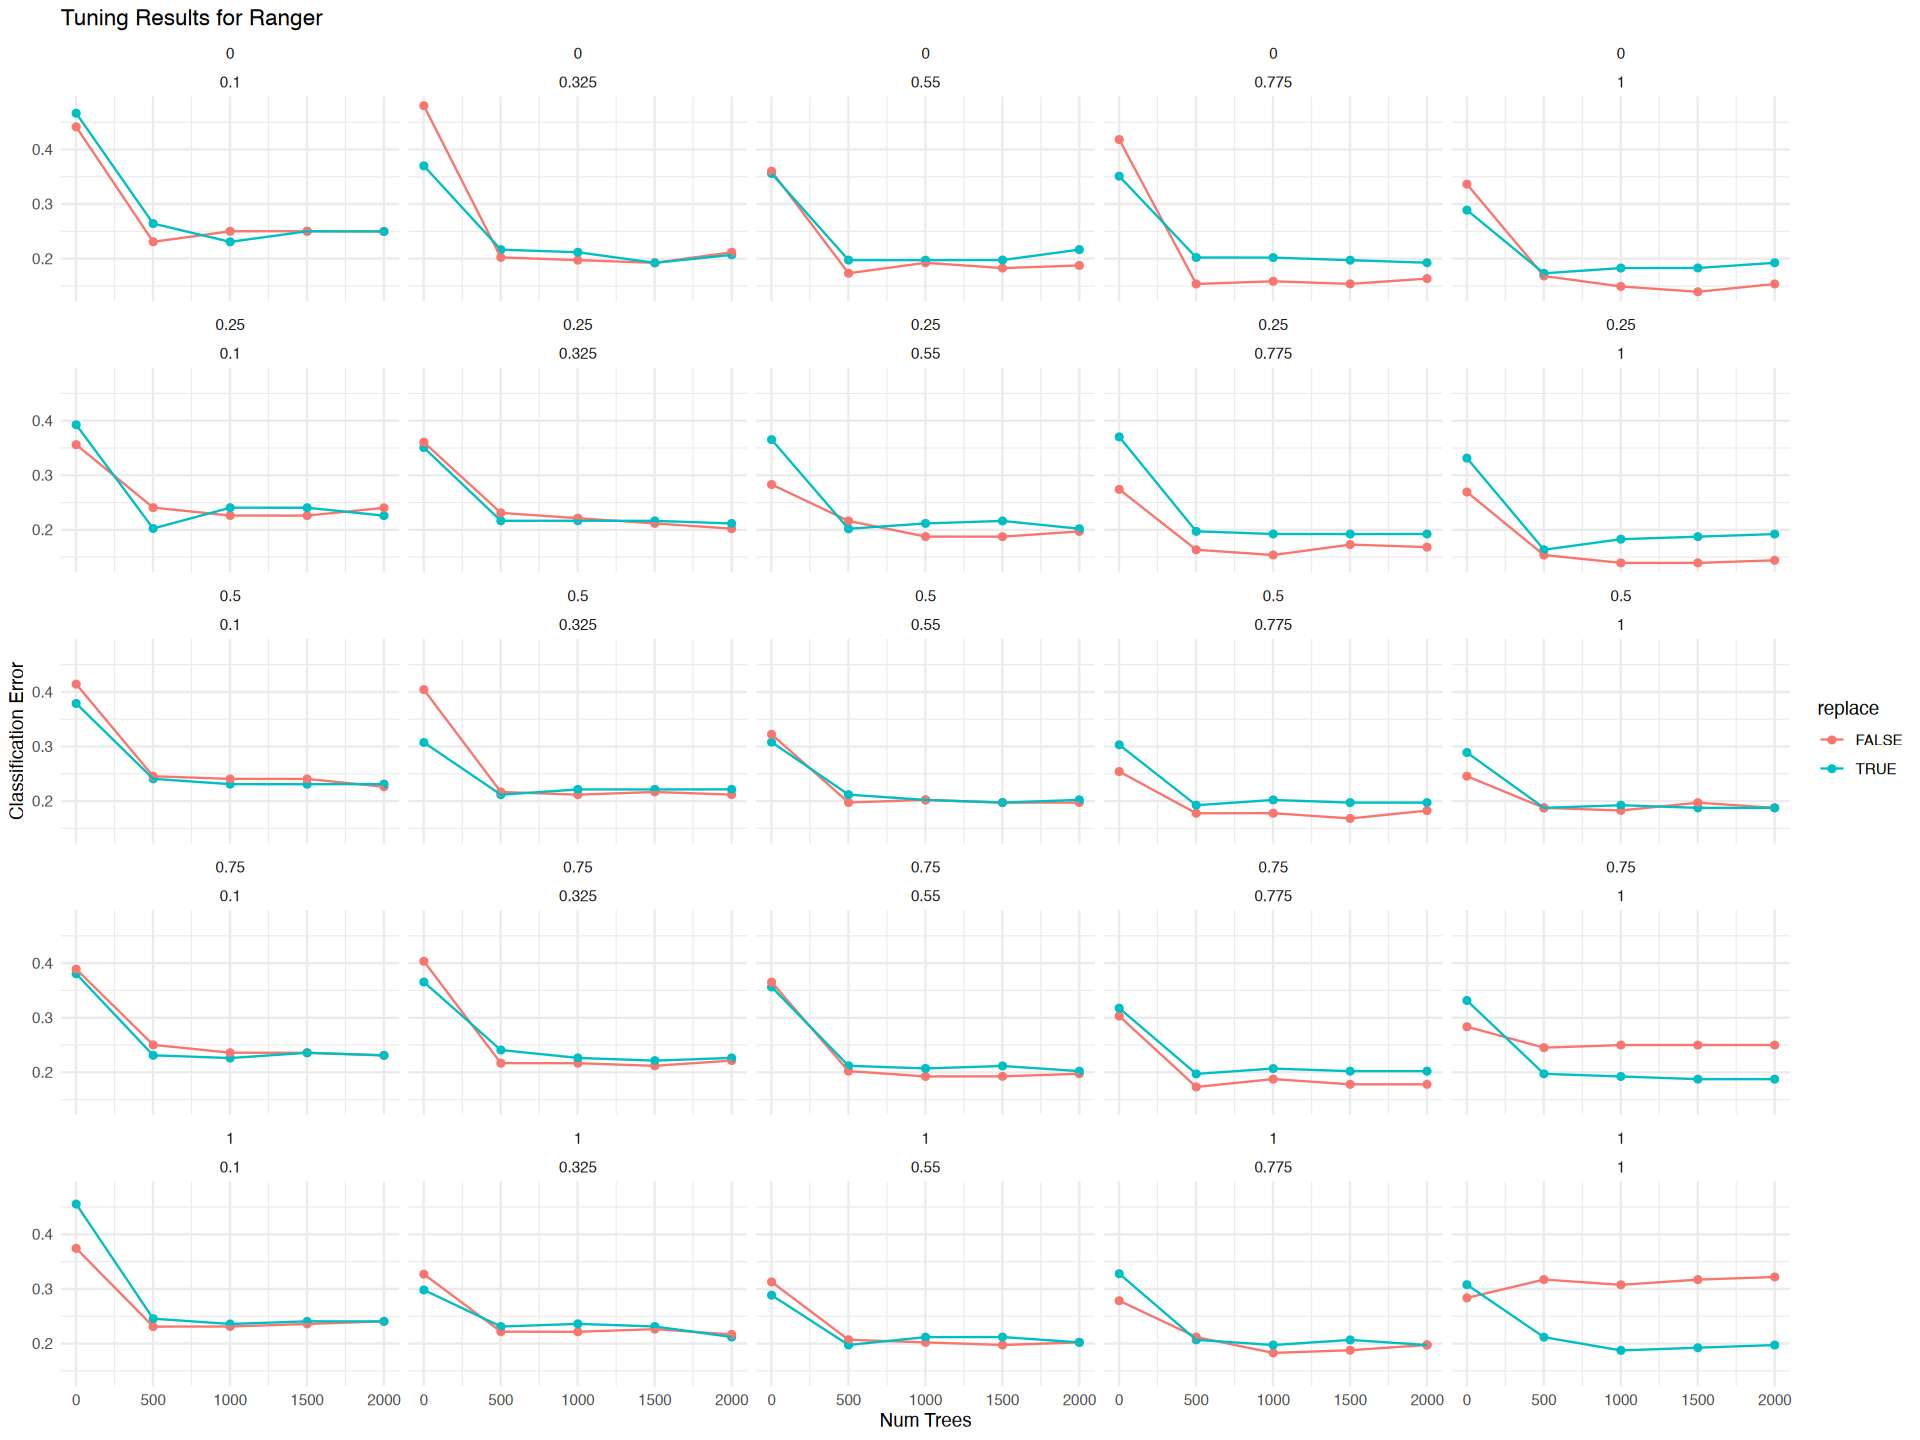

In [29]:
# 提取数据
df <- instance$archive %>%
  as.data.table() %>%
  select(mtry.ratio, num.trees, replace, sample.fraction, classif.ce) %>%
  mutate(
    mtry.ratio = as.factor(mtry.ratio),
    sample.fraction = as.factor(sample.fraction),
    replace = as.factor(replace)
  ) %>%
  arrange(classif.ce)

# 绘图
# 调整画布大小
options(repr.plot.width = 16, repr.plot.height = 12)
ggplot(df, aes(x = num.trees, y = classif.ce, color = replace)) +
  geom_point() +
  geom_line() +
  facet_wrap(~ mtry.ratio + sample.fraction) +
  labs(
    title = "Tuning Results for Ranger",
    x = "Num Trees",
    y = "Classification Error"
  ) +
  theme_minimal()

## 模型解释

In [33]:
# 定义学习器
lrn_ranger <- lrn("classif.ranger", predict_type = "prob")

# 传入参数
lrn_ranger$param_set$values <- instance$result_learner_param_vals

# 训练模型
lrn_ranger$train(tsk_sonar)

# 预测
pred_ranger <- lrn_ranger$predict(tsk_sonar)

# 查看预测结果
pred_ranger$score(msr("classif.ce"))

classif.ce 
         0

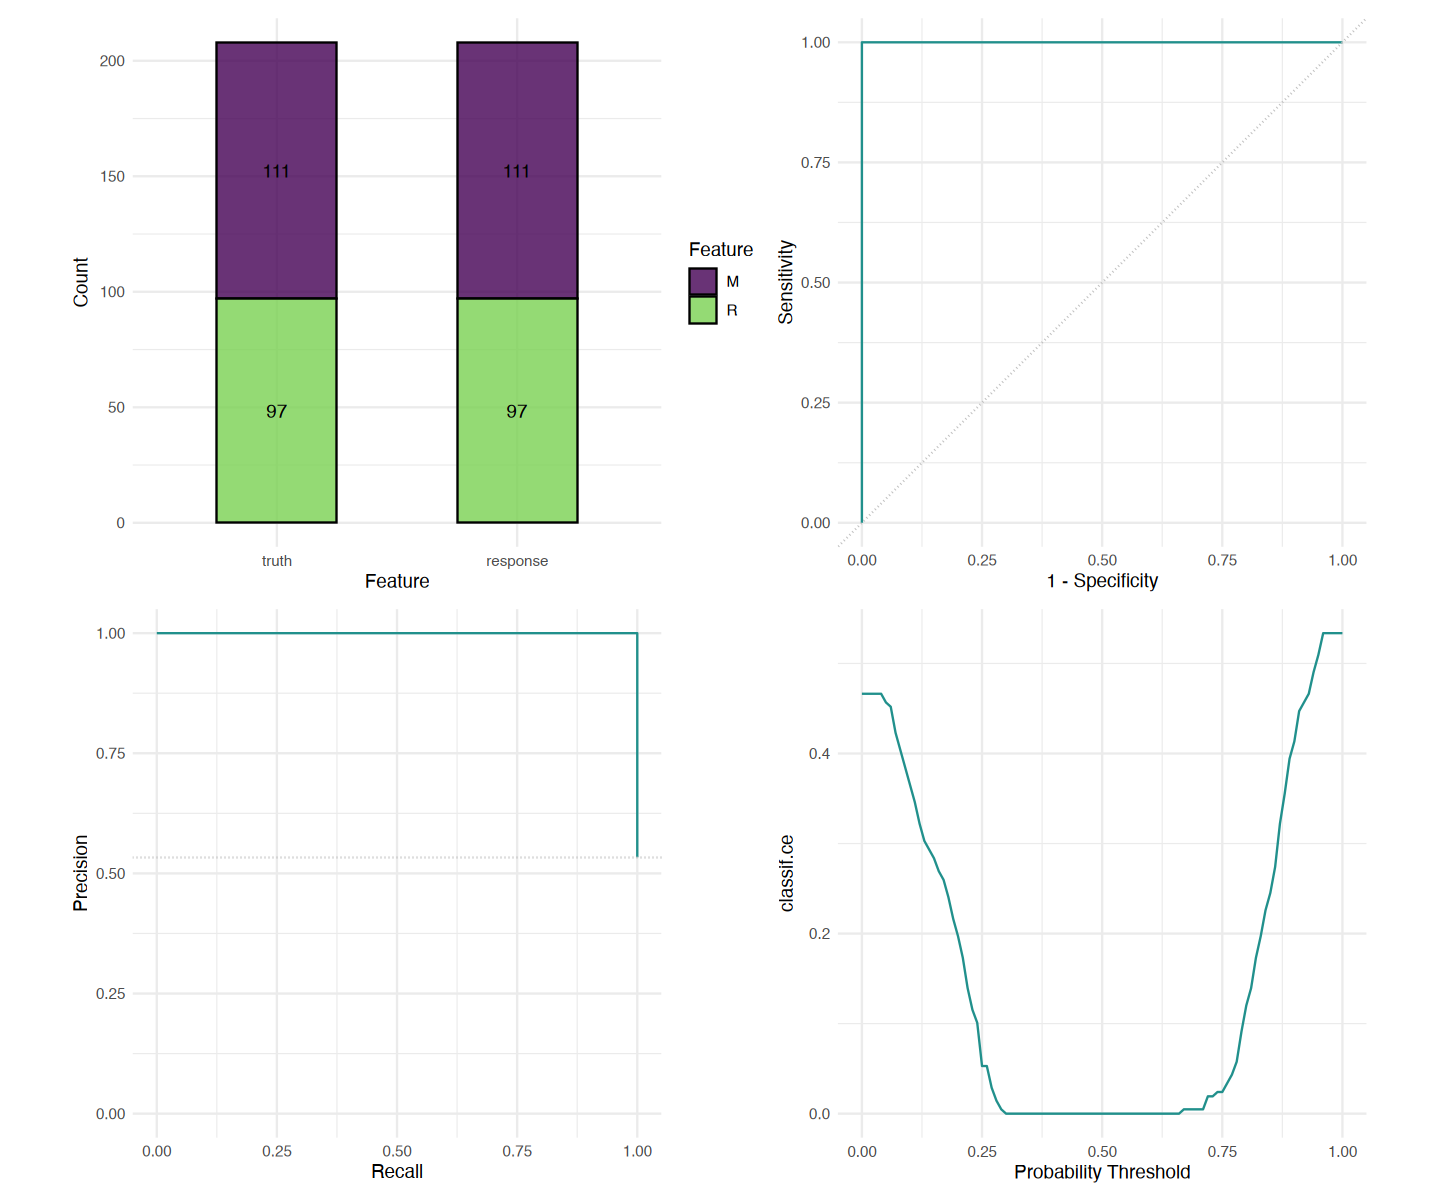

In [37]:
# 绘图
p_stack <- autoplot(pred_ranger, type = "stacked")
p_roc <- autoplot(pred_ranger, type = "roc")
p_prc <- autoplot(pred_ranger, type = "prc")
p_thresh <- autoplot(pred_ranger, type = "threshold")

# 修改画布大小
options(repr.plot.width = 12, repr.plot.height = 10)

# 使用 patchwork 组合图形
library(patchwork)
p_stack + p_roc + p_prc + p_thresh +
  plot_layout(ncol = 2)

## 模型解释

In [41]:
tsk_sonar$head()

Class,V1,V10,V11,V12,V13,V14,V15,V16,V17,...,V55,V56,V57,V58,V59,V6,V60,V7,V8,V9
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
R,0.0200,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,...,0.0072,0.0167,0.0180,0.0084,0.0090,0.0986,0.0032,0.1539,0.1601,0.3109
R,0.0453,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,...,0.0094,0.0191,0.0140,0.0049,0.0052,0.2583,0.0044,0.2156,0.3481,0.3337
R,0.0262,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,...,0.0180,0.0244,0.0316,0.0164,0.0095,0.2280,0.0078,0.2431,0.3771,0.5598
R,0.0100,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,...,0.0085,0.0073,0.0050,0.0044,0.0040,0.0368,0.0117,0.1098,0.1276,0.0598
R,0.0762,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,...,0.0110,0.0015,0.0072,0.0048,0.0107,0.0649,0.0094,0.1209,0.2467,0.3564
R,0.0286,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,...,0.0013,0.0089,0.0057,0.0027,0.0051,0.0990,0.0062,0.1201,0.1833,0.2105


In [39]:
library(iml)

# 提取测试集特征和目标变量
sonar_x <- tsk_sonar$data(cols = tsk_sonar$feature_names)
sonar_y <- tsk_sonar$data(cols = tsk_sonar$target_names)

# 构建IML解释器
predictor <- Predictor$new(
  model = lrn_ranger,
  data = sonar_x,
  y = sonar_y
)

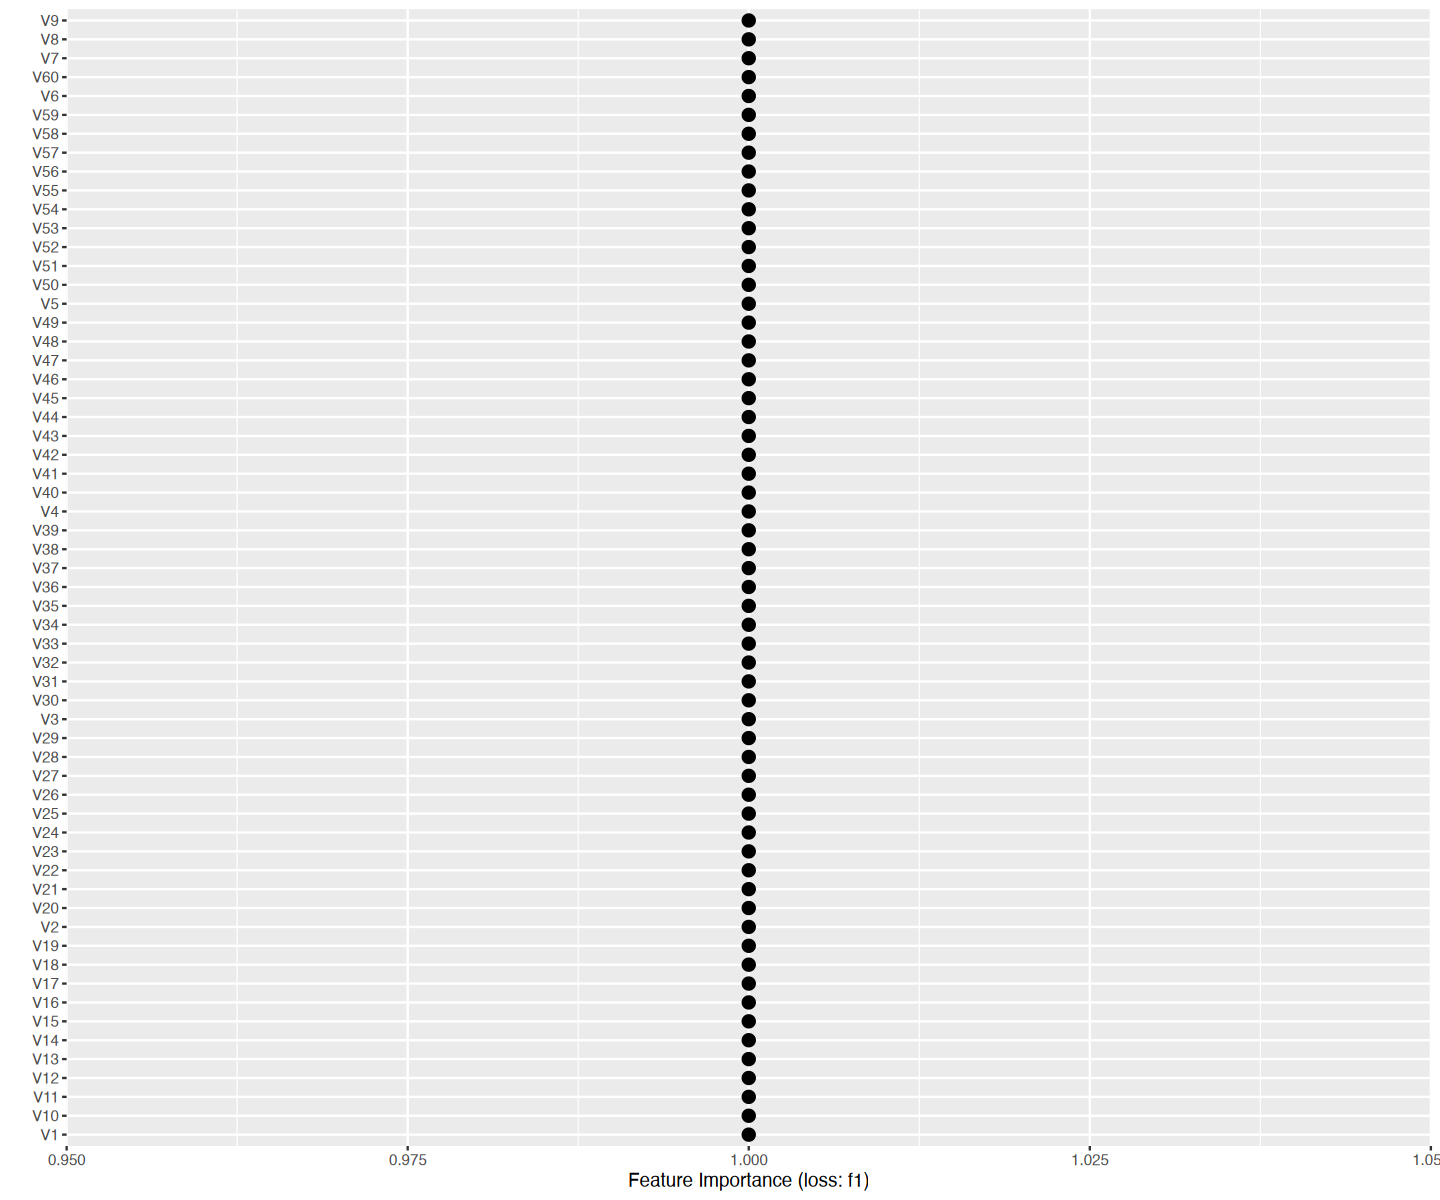

In [43]:
importance <- FeatureImp$new(
  predictor,
  loss = "f1",
  n.repetitions = 100
)
importance$plot()

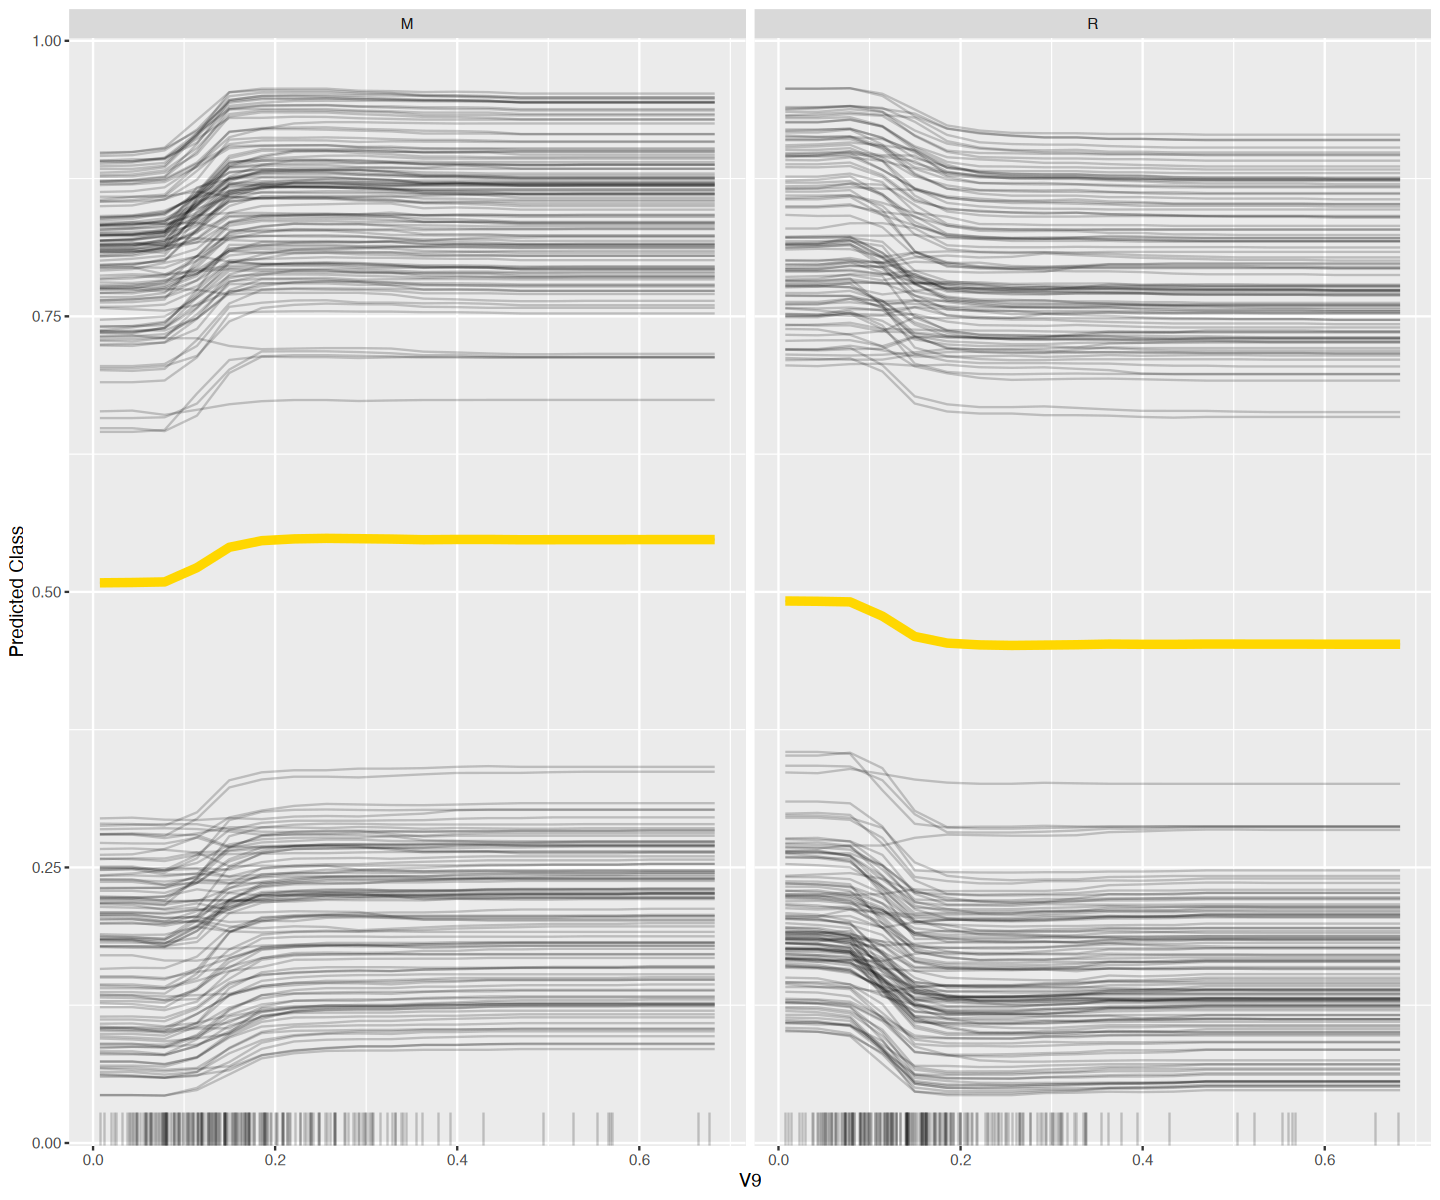

In [45]:
effect <- FeatureEffect$new(
  predictor,
  feature = "V9",
  method = "pdp+ice"
)
effect$plot()

Aggregating predictions.. Progress: 93%. Estimated remaining time: 2 seconds.


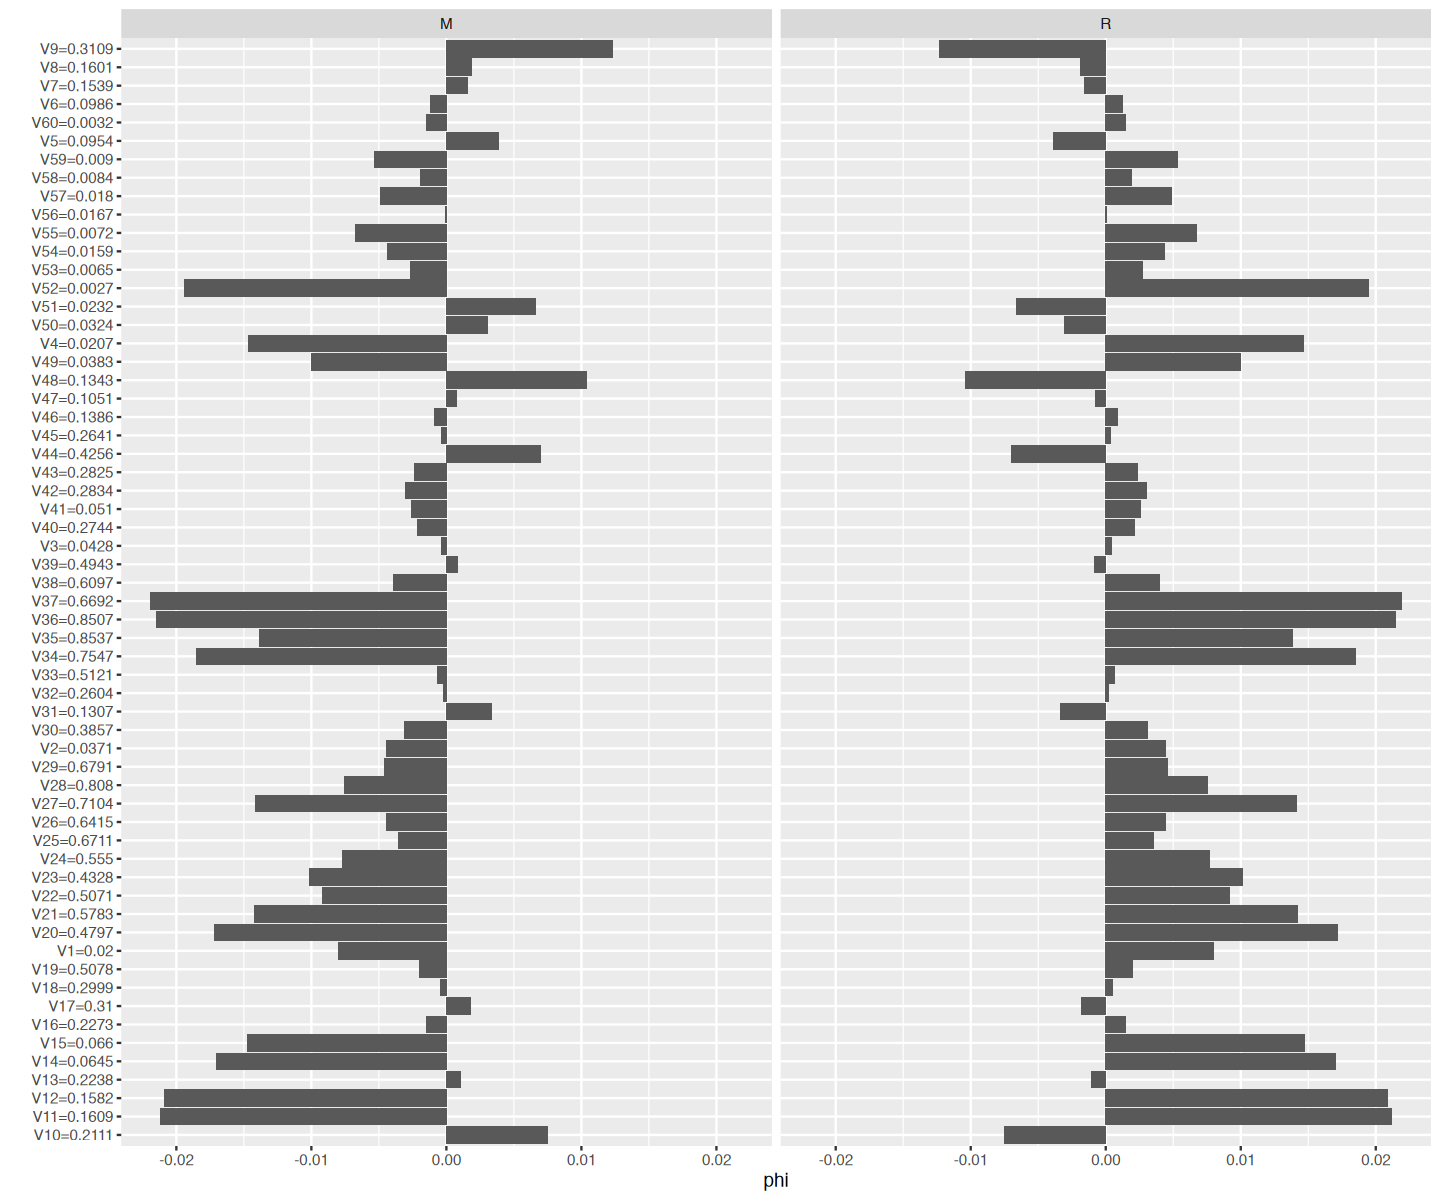

In [48]:
df_test <- tsk_sonar$data(cols = tsk_sonar$feature_names)[1]
shapley <- Shapley$new(
  predictor,
  x.interest = df_test,
  sample.size = 1000
)
shapley$plot()

# randomForest

## 基础使用

In [3]:
library(tidyverse)
library(mlr3verse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: mlr3



In [4]:
# 定义任务
tsk_sonar <- tsk("sonar")

# 定义学习器
lrn_rf <- lrn("classif.randomForest", predict_type = "prob")

# 训练
lrn_rf$train(tsk_sonar)

# 预测
pred_rf <- lrn_rf$predict(tsk_sonar)

# 查看预测结果
pred_rf$score(msr("classif.ce"))

classif.ce 
         0

In [ ]:
lrn_rf$param_set

# <ParamSet(19)>
#              id    class lower upper nlevels        default  value
#          <char>   <char> <num> <num>   <num>         <list> <list>
#  1:       ntree ParamInt     1   Inf     Inf            500 [NULL]
#  2:        mtry ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
#  3:     replace ParamLgl    NA    NA       2           TRUE [NULL]
#  4:     classwt ParamUty    NA    NA     Inf         [NULL] [NULL]
#  5:      cutoff ParamUty    NA    NA     Inf <NoDefault[0]> [NULL]
#  6:      strata ParamUty    NA    NA     Inf <NoDefault[0]> [NULL]
#  7:    sampsize ParamUty    NA    NA     Inf <NoDefault[0]> [NULL]
#  8:    nodesize ParamInt     1   Inf     Inf              1 [NULL]
#  9:    maxnodes ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
# 10:  importance ParamFct    NA    NA       3          FALSE [NULL]
# 11:    localImp ParamLgl    NA    NA       2          FALSE [NULL]
# 12:   proximity ParamLgl    NA    NA       2          FALSE [NULL]
# 13:    oob.prox ParamLgl    NA    NA       2 <NoDefault[0]> [NULL]
# 14:  norm.votes ParamLgl    NA    NA       2           TRUE [NULL]
# 15:    do.trace ParamLgl    NA    NA       2          FALSE [NULL]
# 16: keep.forest ParamLgl    NA    NA       2           TRUE [NULL]
# 17:  keep.inbag ParamLgl    NA    NA       2          FALSE [NULL]
# 18: predict.all ParamLgl    NA    NA       2          FALSE [NULL]
# 19:       nodes ParamLgl    NA    NA       2          FALSE [NULL]

<ParamSet(19)>
             id    class lower upper nlevels        default  value
         <char>   <char> <num> <num>   <num>         <list> <list>
 1:       ntree ParamInt     1   Inf     Inf            500 [NULL]
 2:        mtry ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
 3:     replace ParamLgl    NA    NA       2           TRUE [NULL]
 4:     classwt ParamUty    NA    NA     Inf         [NULL] [NULL]
 5:      cutoff ParamUty    NA    NA     Inf <NoDefault[0]> [NULL]
 6:      strata ParamUty    NA    NA     Inf <NoDefault[0]> [NULL]
 7:    sampsize ParamUty    NA    NA     Inf <NoDefault[0]> [NULL]
 8:    nodesize ParamInt     1   Inf     Inf              1 [NULL]
 9:    maxnodes ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
10:  importance ParamFct    NA    NA       3          FALSE [NULL]
11:    localImp ParamLgl    NA    NA       2          FALSE [NULL]
12:   proximity ParamLgl    NA    NA       2          FALSE [NULL]
13:    oob.prox ParamLgl    NA    NA       2 <N

## 调参

In [ ]:
# 定义任务
tsk_sonar <- tsk("sonar")

# 定义学习器
lrn_rf <- lrn("classif.randomForest", predict_type = "prob")

# 定义搜索空间
ps_rf <- ps(
  mtry = p_int(lower = 1, upper = 60),
  ntree = p_int(lower = 100, upper = 2000),
  replace = p_lgl(default = TRUE)
)

# 定义调参器
tuner_rf <- tnr("grid_search", resolution = 5)

# 并行化
future::plan("multisession", workers = 4)

# 调参
instance_rf <- tune(
  task = tsk_sonar,
  learner = lrn_rf,
  search_space = ps_rf,
  tuner = tuner_rf,
  resampling = rsmp("cv", folds = 5),
  measure = msr("classif.ce")
)

## 模型解释

In [8]:
# 定义任务
tsk_sonar <- tsk("sonar")

# 定义学习器
lnr_rf <- lrn("classif.randomForest", predict_type = "prob")

# 划分训练集和测试集
set.seed(123)
splits <- partition(tsk_sonar)

# 训练学习器
lrn_rf$train(tsk_sonar, row_id = splits$train)

# 预测
pred_rf <- lrn_rf$predict(tsk_sonar, row_id = splits$test)

# 查看预测结果
pred_rf$score(msr("classif.ce"))

classif.ce 
 0.2028986

In [10]:
sonar_x <- tsk_sonar$data(rows = splits$test, cols = tsk_sonar$feature_names)
sonar_y <- tsk_sonar$data(rows = splits$test, cols = tsk_sonar$target_names)

# 构建IML解释器
library(iml)
predictor_rf <- Predictor$new(
  model = lrn_rf,
  data = sonar_x,
  y = sonar_y
)

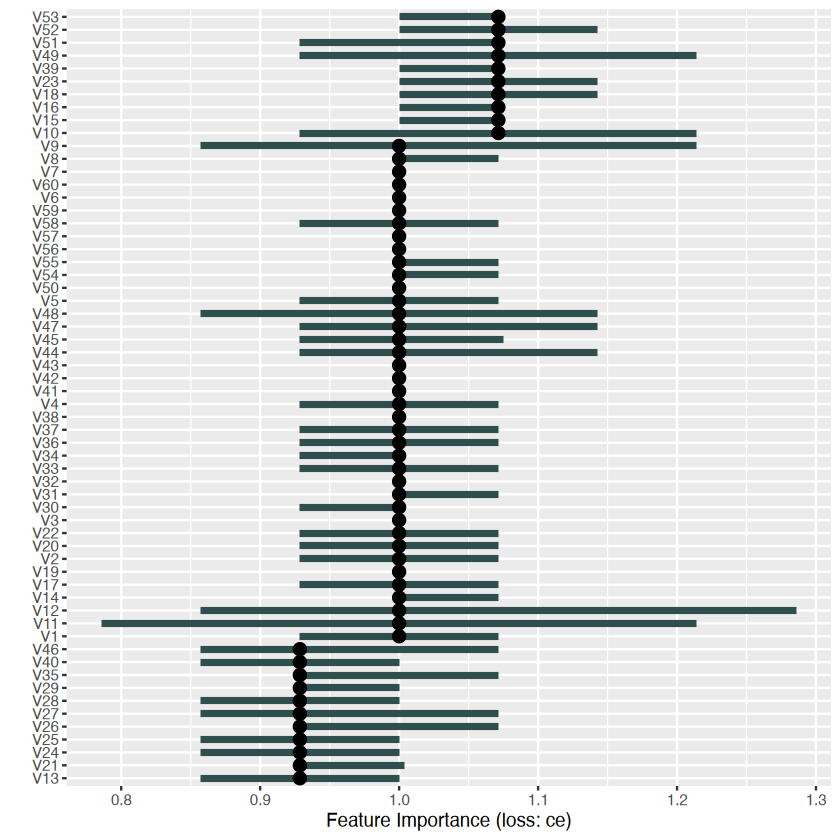

In [11]:
# 重要性
importance_rf <- FeatureImp$new(
  predictor_rf,
  loss = "ce",
  n.repetitions = 100
)
importance_rf$plot()

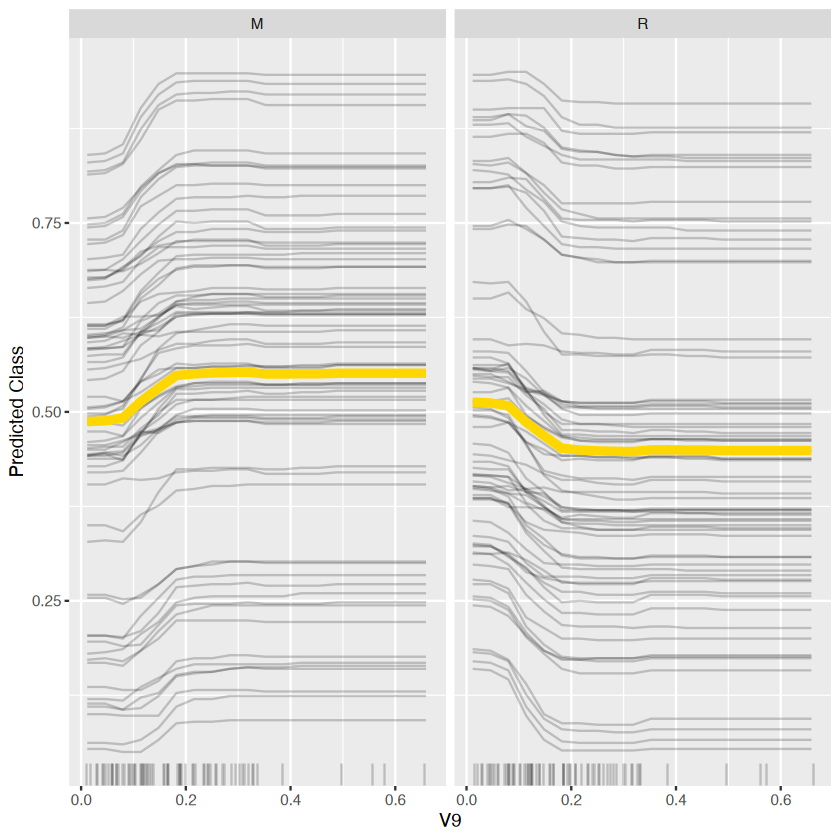

In [12]:
# 绘制PD+ICE图
effect_rf <- FeatureEffect$new(
  predictor_rf,
  feature = "V9",
  method = "pdp+ice"
)
effect_rf$plot()

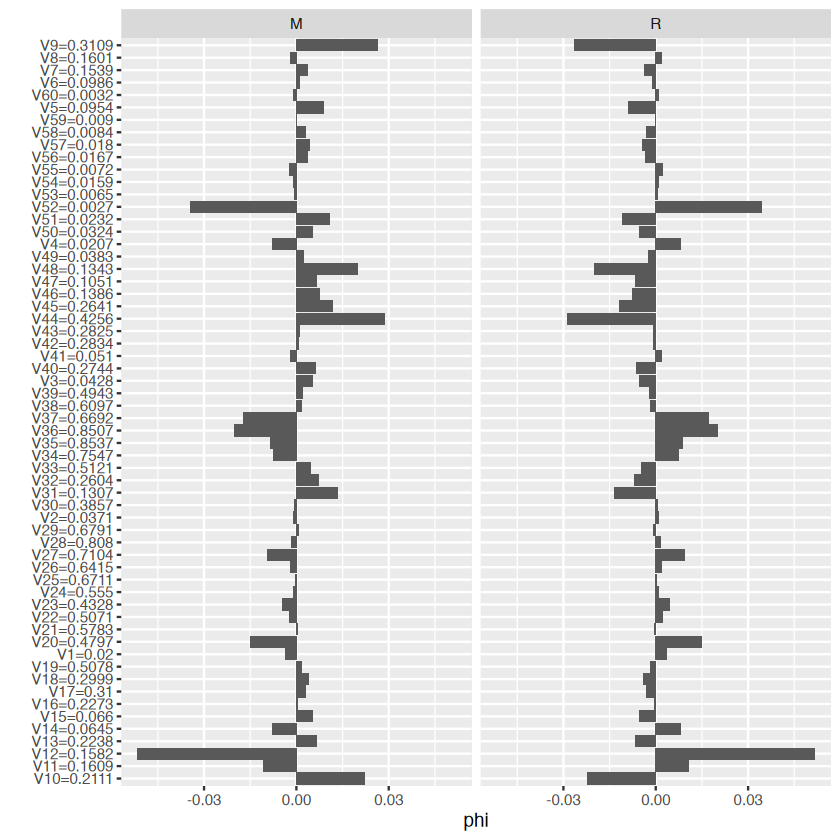

In [13]:
df_test <- tsk_sonar$data(
  rows = splits$test,
  cols = tsk_sonar$feature_names
)[1, ]
shapley_rf <- Shapley$new(
  predictor_rf,
  x.interest = df_test,
  sample.size = 1000
)
shapley_rf$plot()